# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# convert the date column to datetime format
#pyber_data_df["date"] = pd.to_datetime(pyber_data_df["date"], infer_datetime_format=True)
# *************** changing to datetime here changes the inclusivity behavior. ***************
#when doing 01-01:04-28 on a DATETIME object, it will include all times 
#    on 04-28 (so it includes 04-28 00:15:00 and 04-28 04:00:00, etc).
#when doing 01-01:04-28 on a STRING object, it excludes everything after 04-28 00:00:00

# Display the data table for preview
pyber_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2375 entries, 0 to 2374
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   city          2375 non-null   object 
 1   date          2375 non-null   object 
 2   fare          2375 non-null   float64
 3   ride_id       2375 non-null   int64  
 4   driver_count  2375 non-null   int64  
 5   type          2375 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 129.9+ KB


## Deliverable 1: Get a Summary DataFrame 

In [3]:
#  1. Get the total rides for each city type
ride_counts = pyber_data_df.groupby(["type"]).count()["ride_id"]
ride_counts

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [4]:
# 2. Get the total drivers for each city type
driver_counts = pyber_data_df.groupby(["type", "city"]).mean().groupby(["type"]).sum()["driver_count"]
driver_counts

type
Rural         78.0
Suburban     490.0
Urban       2405.0
Name: driver_count, dtype: float64

In [5]:
#  3. Get the total amount of fares for each city type
fare_totals = pyber_data_df.groupby(["type"]).sum()["fare"]
fare_totals
#pyber_data_df.groupby("type").std()["fare"]/pyber_data_df.groupby("type").sum()["fare"]
#pyber_data_df.groupby("type").std()["fare"]

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [6]:
#  4. Get the average fare per ride for each city type. 
fare_avgs = fare_totals/ride_counts
fare_avgs

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [7]:
# 5. Get the average fare per driver for each city type. 
driver_avgs = fare_totals/driver_counts
driver_avgs

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [8]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame({"Total Rides": ride_counts, "Total Drivers" : driver_counts, "Total Fares" : fare_totals,\
              "Average Fare per Ride": fare_avgs, "Average Fare per Driver": driver_avgs})
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78.0,4327.93,34.623440,55.486282
Suburban,625,490.0,19356.33,30.970128,39.502714
Urban,1625,2405.0,39854.38,24.525772,16.571468


In [9]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [10]:
#  8. Format the columns.
pyber_summary_df = pyber_summary_df.astype({"Total Drivers":int})
pretty_pyber_summary = pyber_summary_df.style.format({
    "Total Rides" : "{:,}", "Total Drivers" : "{:,}", "Total Fares" : "${:,.2f}",
    "Average Fare per Ride" : "${:,.2f}", "Average Fare per Driver" : "${:,.2f}"
})
#DataFrame.style returns a styler object and renders it to CSS/HTML (to html under the hood in jupyter)
#cannot do data analysis on a styler object, so do not name it the same as the dataframe you're using for analysis

#show the formatted table
pretty_pyber_summary


,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [11]:
# 1. Read the merged DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [12]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
grouped_pyber = pyber_data_df.groupby(["type", "date"]).sum()["fare"]
grouped_pyber

type   date               
Rural  2019-01-01 09:45:36    43.69
       2019-01-02 11:18:32    52.12
       2019-01-03 19:51:01    19.90
       2019-01-04 03:31:26    24.88
       2019-01-06 07:38:40    47.33
                              ...  
Urban  2019-05-08 04:20:00    21.99
       2019-05-08 04:39:49    18.45
       2019-05-08 07:29:01    18.55
       2019-05-08 11:38:35    19.77
       2019-05-08 13:10:18    18.04
Name: fare, Length: 2375, dtype: float64

In [13]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
grouped_pyber = grouped_pyber.reset_index()
grouped_pyber

,type,date,fare
0,Rural,2019-01-01 09:45:36,43.69
1,Rural,2019-01-02 11:18:32,52.12
2,Rural,2019-01-03 19:51:01,19.90
3,Rural,2019-01-04 03:31:26,24.88
4,Rural,2019-01-06 07:38:40,47.33
...,...,...,...
2370,Urban,2019-05-08 04:20:00,21.99
2371,Urban,2019-05-08 04:39:49,18.45
2372,Urban,2019-05-08 07:29:01,18.55
2373,Urban,2019-05-08 11:38:35,19.77


In [14]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
pivot_pyber = grouped_pyber.pivot(index="date", columns='type', values='fare')
pivot_pyber

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [15]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-28'.
pivot_pyber_trim = pivot_pyber.loc['2019-01-01':'2019-04-28'].copy()
pivot_pyber_trim.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2177 entries, 2019-01-01 00:08:16 to 2019-04-27 23:52:44
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  567 non-null    float64
 2   Urban     1496 non-null   float64
dtypes: float64(3)
memory usage: 68.0+ KB


In [16]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
pivot_pyber_trim.index = pd.to_datetime(pivot_pyber_trim.index)

# this step already done way up above when the dataframes were merged

In [17]:
# 7. Check that the datatype for the index is datetime using df.info()
pivot_pyber_trim.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2177 entries, 2019-01-01 00:08:16 to 2019-04-27 23:52:44
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  567 non-null    float64
 2   Urban     1496 non-null   float64
dtypes: float64(3)
memory usage: 68.0 KB


In [18]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
pivot_pyber_resampled = pivot_pyber_trim.resample("w").sum()
pivot_pyber_resampled

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


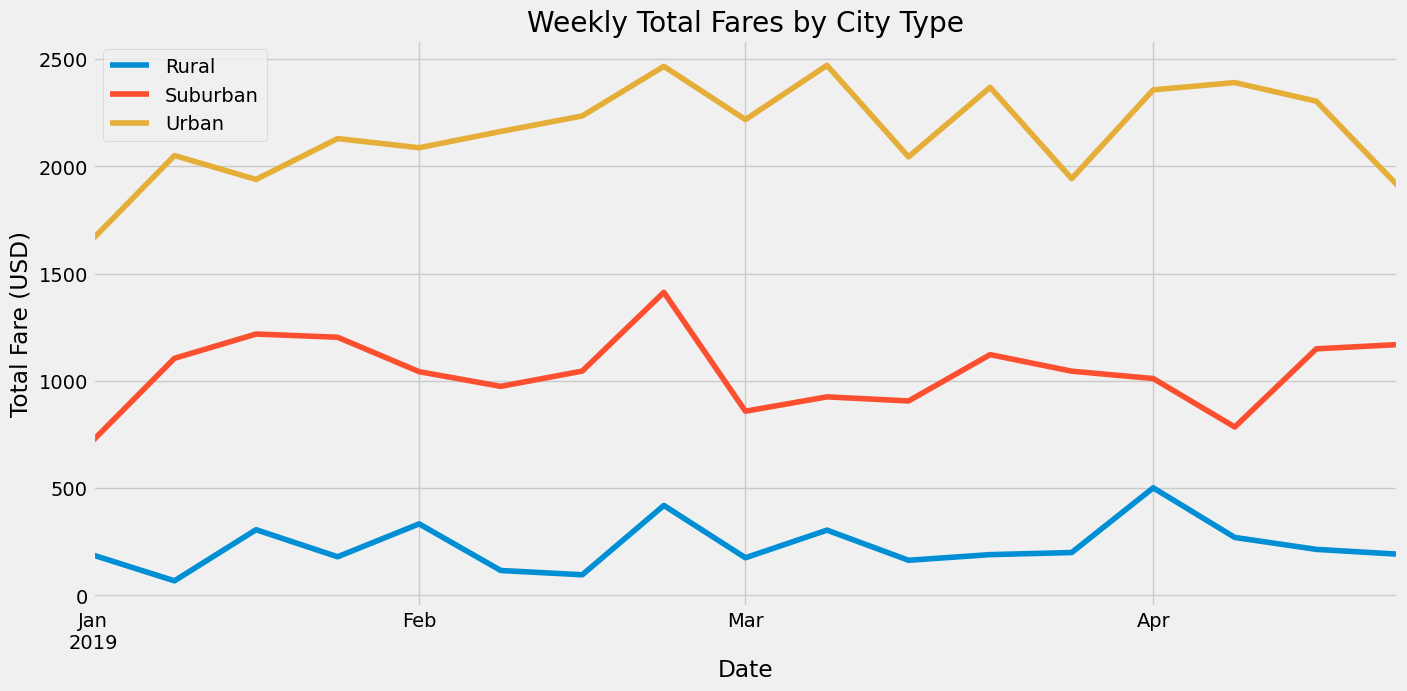

In [19]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

pyber_graph = pivot_pyber_resampled.plot(kind='line', figsize=(15,7))
pyber_graph.set_title("Weekly Total Fares by City Type")
pyber_graph.set_xlabel("Date")
pyber_graph.set_ylabel("Total Fare (USD)")
pyber_graph.legend(loc="upper left")
plt.show()



In [20]:

# resamp_per = "8d"
# pivot_pyber_days = pivot_pyber_trim.resample(resamp_per).sum()
# plt.figure(figsize=(15,6))
# plt.plot(pivot_pyber_days.index, pivot_pyber_days["Rural"]/pyber_summary_df.loc["Rural","Total Drivers"], label="rural")
# plt.plot(pivot_pyber_days.index, pivot_pyber_days["Urban"]/pyber_summary_df.loc["Urban","Total Drivers"], label="urban")
# plt.plot(pivot_pyber_days.index, pivot_pyber_days["Suburban"]/pyber_summary_df.loc["Suburban","Total Drivers"], label="suburb")
# plt.legend()
# plt.title(f"Average fare over {resamp_per} per Total Drivers")
# plt.show()


In [21]:

# resamp_per2 = "7d"
# pivot_pyber_days = pivot_pyber_trim.resample(resamp_per2).sum()
# plt.figure(figsize=(15,6))
# plt.plot(pivot_pyber_days.index, pivot_pyber_days["Rural"]/pyber_summary_df.loc["Rural","Total Rides"], label="rural")
# plt.plot(pivot_pyber_days.index, pivot_pyber_days["Urban"]/pyber_summary_df.loc["Urban","Total Rides"], label="urban")
# plt.plot(pivot_pyber_days.index, pivot_pyber_days["Suburban"]/pyber_summary_df.loc["Suburban","Total Rides"], label="suburb")
# plt.legend()
# plt.title(f"Average fare over {resamp_per2} per Total Rides")
# plt.show()


In [22]:
print(pivot_pyber_resampled.describe())
print("\tMeans:\n",pivot_pyber_resampled.mean())
print("\tStd Devs:\n",pivot_pyber_resampled.std())
print("\tStd dev/mean:\n", pivot_pyber_resampled.std()/pivot_pyber_resampled.mean())
print("\tStd dev/total drivers:\n",pivot_pyber_resampled.std()/pyber_summary_df["Total Drivers"])
print("\tStd dev/total rides:\n",pivot_pyber_resampled.std()/pyber_summary_df["Total Rides"])

type        Rural     Suburban        Urban
count   17.000000    17.000000    17.000000
mean   230.217059  1040.860588  2161.000000
std    113.517344   171.878829   222.800874
min     67.650000   721.600000  1661.680000
25%    175.140000   925.270000  2044.420000
50%    191.850000  1045.060000  2162.640000
75%    303.940000  1149.270000  2356.700000
max    501.240000  1412.740000  2470.930000
	Means:
 type
Rural        230.217059
Suburban    1040.860588
Urban       2161.000000
dtype: float64
	Std Devs:
 type
Rural       113.517344
Suburban    171.878829
Urban       222.800874
dtype: float64
	Std dev/mean:
 type
Rural       0.493088
Suburban    0.165131
Urban       0.103101
dtype: float64
	Std dev/total drivers:
 type
Rural       1.455351
Suburban    0.350773
Urban       0.092641
dtype: float64
	Std dev/total rides:
 type
Rural       0.908139
Suburban    0.275006
Urban       0.137108
dtype: float64


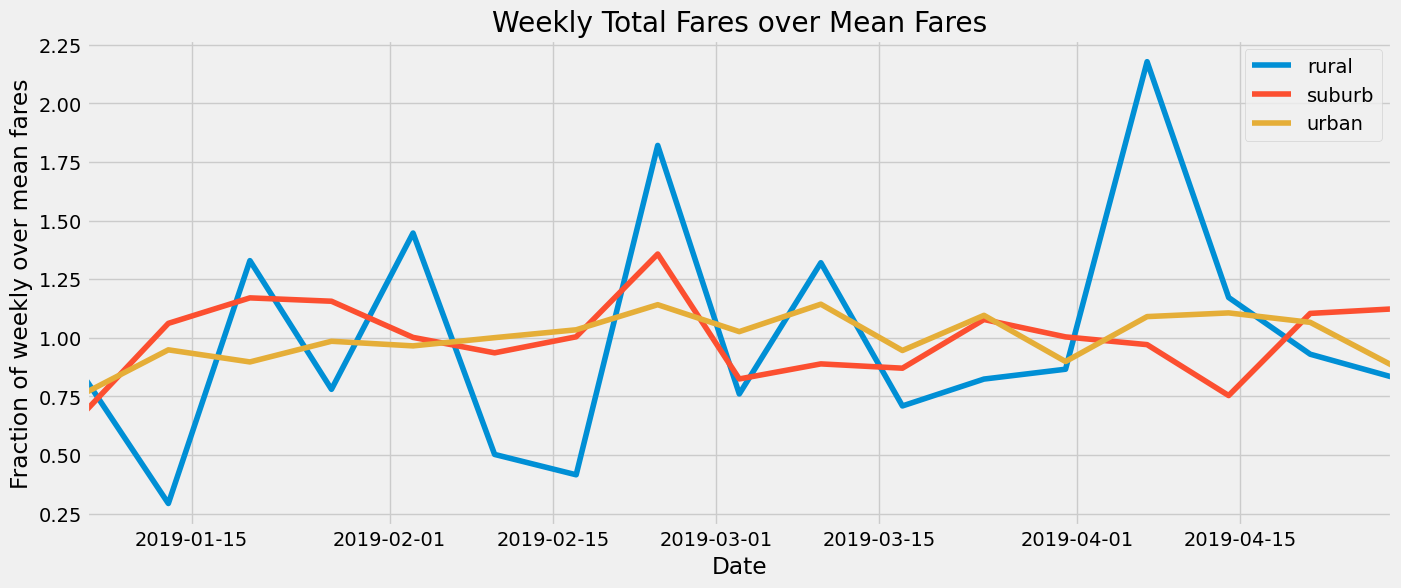

In [23]:
resamp_means = pivot_pyber_resampled.mean()
plt.figure(figsize=(15,6))
plt.plot(pivot_pyber_resampled.index, pivot_pyber_resampled["Rural"]/resamp_means["Rural"],\
         label="rural")
plt.plot(pivot_pyber_resampled.index, pivot_pyber_resampled["Suburban"]/resamp_means["Suburban"],\
         label="suburb")
plt.plot(pivot_pyber_resampled.index, pivot_pyber_resampled["Urban"]/resamp_means["Urban"],\
         label="urban")
plt.legend()
plt.title(f"Weekly Total Fares over Mean Fares")
plt.ylabel("Fraction of weekly over mean fares")
plt.xlabel("Date")
plt.xlim(pivot_pyber_resampled.index[0], pivot_pyber_resampled.index[-1])
plt.show()

In [24]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
grouped_pyber2 = pyber_data_df.groupby(["type", "date"]).count()["ride_id"]
grouped_pyber2

type   date               
Rural  2019-01-01 09:45:36    1
       2019-01-02 11:18:32    1
       2019-01-03 19:51:01    1
       2019-01-04 03:31:26    1
       2019-01-06 07:38:40    1
                             ..
Urban  2019-05-08 04:20:00    1
       2019-05-08 04:39:49    1
       2019-05-08 07:29:01    1
       2019-05-08 11:38:35    1
       2019-05-08 13:10:18    1
Name: ride_id, Length: 2375, dtype: int64

In [25]:
grouped_pyber2 = grouped_pyber2.reset_index()
grouped_pyber2

,type,date,ride_id
0,Rural,2019-01-01 09:45:36,1
1,Rural,2019-01-02 11:18:32,1
2,Rural,2019-01-03 19:51:01,1
3,Rural,2019-01-04 03:31:26,1
4,Rural,2019-01-06 07:38:40,1
...,...,...,...
2370,Urban,2019-05-08 04:20:00,1
2371,Urban,2019-05-08 04:39:49,1
2372,Urban,2019-05-08 07:29:01,1
2373,Urban,2019-05-08 11:38:35,1


In [27]:
pivot_pyber2 = grouped_pyber2.pivot(index="date", columns='type', values='ride_id')
pivot_pyber2

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,1.0
2019-01-01 00:46:46,NaN,1.0,NaN
2019-01-01 02:07:24,NaN,1.0,NaN
2019-01-01 03:46:50,NaN,NaN,1.0
2019-01-01 05:23:21,NaN,NaN,1.0
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,1.0
2019-05-08 04:39:49,NaN,NaN,1.0
2019-05-08 07:29:01,NaN,NaN,1.0


In [28]:
pivot_pyber_trim2 = pivot_pyber2.loc['2019-01-01':'2019-04-28'].copy()
pivot_pyber_trim2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2177 entries, 2019-01-01 00:08:16 to 2019-04-27 23:52:44
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  567 non-null    float64
 2   Urban     1496 non-null   float64
dtypes: float64(3)
memory usage: 68.0+ KB


In [29]:
pivot_pyber_trim2.index = pd.to_datetime(pivot_pyber_trim2.index)

In [30]:
pivot_pyber_resampled2 = pivot_pyber_trim2.resample("w").sum()
pivot_pyber_resampled2

type,Rural,Suburban,Urban
date,,,
2019-01-06,5.0,22.0,66.0
2019-01-13,3.0,35.0,80.0
2019-01-20,8.0,41.0,84.0
2019-01-27,6.0,34.0,84.0
2019-02-03,9.0,32.0,88.0
2019-02-10,4.0,31.0,94.0
2019-02-17,3.0,34.0,86.0
2019-02-24,11.0,43.0,103.0
2019-03-03,5.0,30.0,88.0


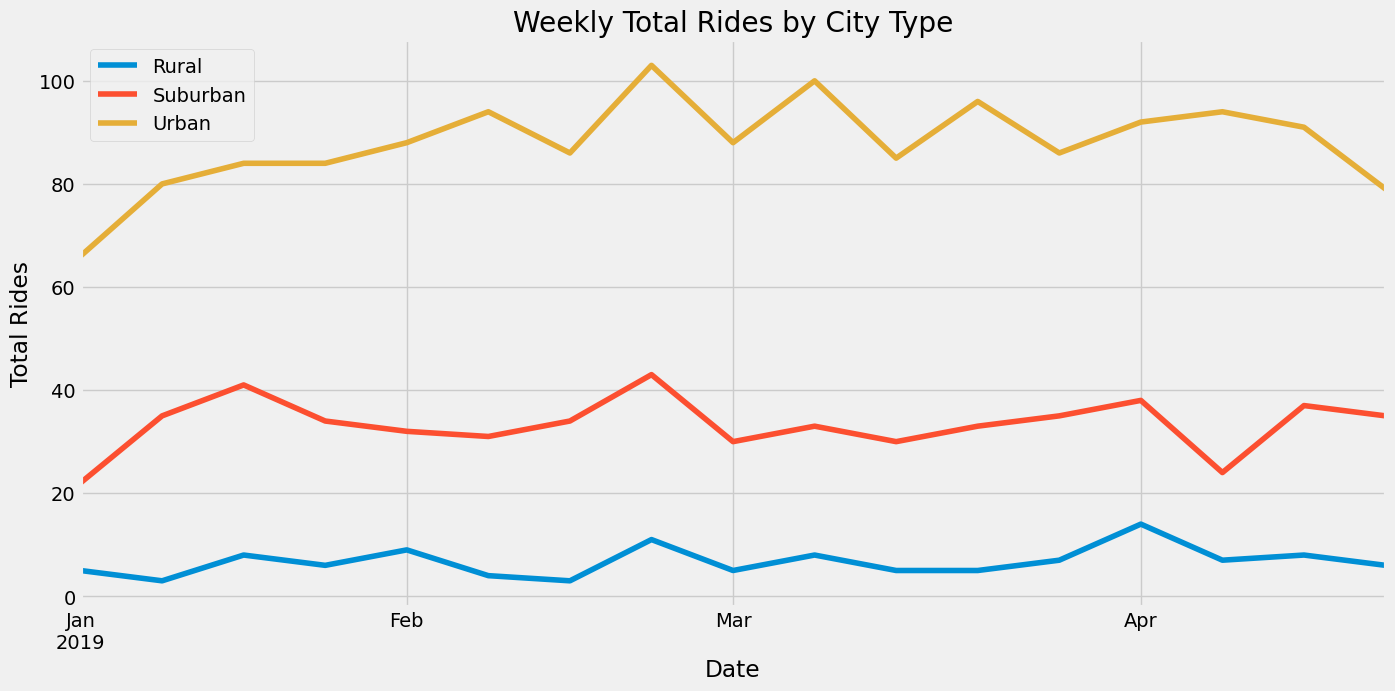

In [32]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

pyber_graph = pivot_pyber_resampled2.plot(kind='line', figsize=(15,7))
pyber_graph.set_title("Weekly Total Rides by City Type")
pyber_graph.set_xlabel("Date")
pyber_graph.set_ylabel("Total Rides")
pyber_graph.legend(loc="upper left")
plt.show()